In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../') # add parent directory to path
import fbs

## Generating a planar fractional Brownian surface

The surface is generated using the [turning bands method](https://doi.org/10.1029/WR018i005p01379). The surface is represented as the super

In [3]:
plane = fbs.PlanarFractionalBrownianSurface(2048, 1024, H=0.5, num_components=50, seed=42)
z = plane.evaluate_grid(2048, 1024, n_threads=2)

1D fBms generated in 0.427 seconds
Using 2 processes
planar fractional Brownian surface generated in 4.275 seconds


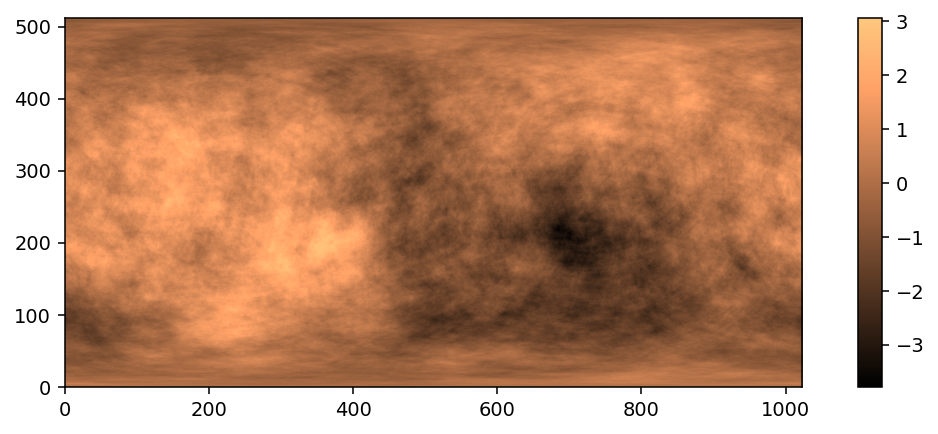

In [8]:
fig, (ax, cax) = plt.subplots(
    1, 2, figsize=(7, 3.2), gridspec_kw={'width_ratios': [7, 0.2]}, layout='tight', dpi=140
)
im = ax.imshow((z-z.mean())/z.std(), cmap='copper', origin='lower', aspect='equal')
fig.colorbar(im, cax=cax, orientation='vertical')
fig.savefig('example_pfbs.png', transparent=False, bbox_inches='tight', dpi=140)
plt.show()

# Generating a spherical fractional Brownian surface

In [5]:
sphere = fbs.SphericalFractionalBrownianSurface(2048*64, H=0.5, num_components=100, seed=1)
z = sphere.evaluate_equilateral(1024, n_threads=2)

1D fBms generated in 0.286 seconds
Using 2 processes
spherical fractional Brownian surface calculated in 8.597 seconds


C:\Users\taave\AppData\Local\Temp\ipykernel_15040\1040416225.py:14: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  im = map.pcolor(xx, yy, (z-z.mean())/z.std(), latlon=False, cmap='copper')


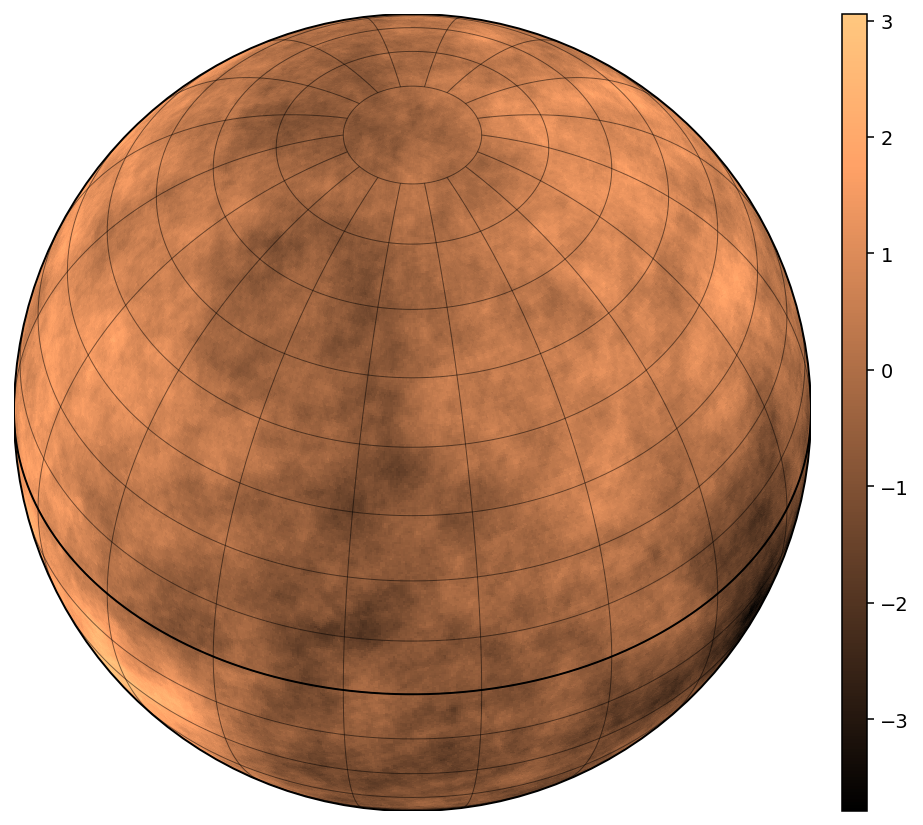

In [9]:
from mpl_toolkits.basemap import Basemap

fig, (ax, cax) = plt.subplots(
    1, 2, figsize=(7, 6), gridspec_kw={'width_ratios': [7, 0.2]}, dpi=140, layout='tight'
)
map = Basemap(projection='ortho', lon_0=0, lat_0=45, ax=ax)

x = np.linspace(-180, 180, z.shape[1], endpoint=True)
y = np.linspace(-90, 90, z.shape[0], endpoint=True)

xx, yy = np.meshgrid(x, y)
xx,yy = map(xx, yy)

im = map.pcolor(xx, yy, (z-z.mean())/z.std(), latlon=False, cmap='copper')

parallels = np.arange(-60.,81,10.)

kw = dict(dashes=(1, 0), linewidth=0.5, color=(0, 0, 0, 0.5))
meridians = np.arange(10.,351.,20.)
map.drawparallels(parallels,labels=[False,False,False,False], **kw)
map.drawmeridians(meridians,labels=[False,False,False,False], **kw)
map.drawparallels([0],labels=[False,False, False,False], dashes=(1, 0), linewidth=1, color=(0, 0, 0))

cb = fig.colorbar(im, cax=cax, orientation='vertical')

fig.savefig('example_sfbs_proj_ortho.png', transparent=False, bbox_inches='tight', dpi=140)
plt.show()

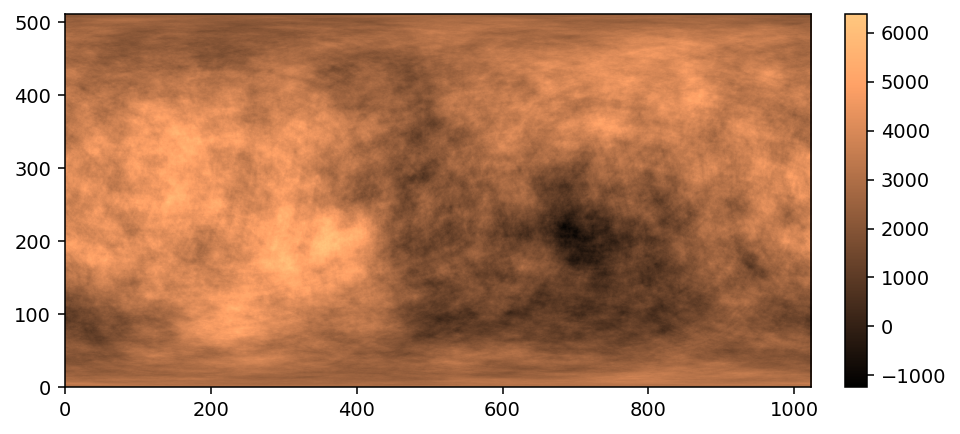

In [10]:
fig, (ax, cax) = plt.subplots(
    1, 2, figsize=(7, 3.2), gridspec_kw={'width_ratios': [7, 0.2]}, layout='tight', dpi=140
)
im = ax.imshow(z, cmap='copper', origin='lower', aspect='equal')
fig.colorbar(im, cax=cax, orientation='vertical')
fig.savefig('example_sfbs_proj_cyl.png', transparent=False, bbox_inches='tight', dpi=140)
plt.show()